In [ ]:
!pip install opencv-python-headless scikit-image numpy scipy matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2gray
from skimage.segmentation import quickshift
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
def load_image(image_path):
    # Load the image, ensuring it's in RGB format if it's a color image
    image = imread(image_path)
    if image.ndim == 2:  # If grayscale, convert to RGB
        image = np.stack([image] * 3, axis=-1)
    return image

def preprocess_image(image):
    # Perform any necessary preprocessing steps here (if needed)
    return image

In [ ]:
def apply_quickshift(image):
    # Parameters: ratio, kernel_size, max_dist
    superpixels = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)
    return superpixels

In [ ]:
def apply_otsu_threshold(image):
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    return binary_image

In [ ]:
def extract_face(image, superpixels, binary_image):
    face_pixels = np.zeros_like(image)
    face_pixels[binary_image] = image[binary_image]
    return face_pixels

In [ ]:
def thermal_face_extraction(image_path):
    image = load_image(image_path)
    preprocessed_image = preprocess_image(image)
    superpixels = apply_quickshift(preprocessed_image)
    binary_image = apply_otsu_threshold(superpixels)
    face_image = extract_face(preprocessed_image, superpixels, binary_image)

    return face_image, preprocessed_image, superpixels, binary_image

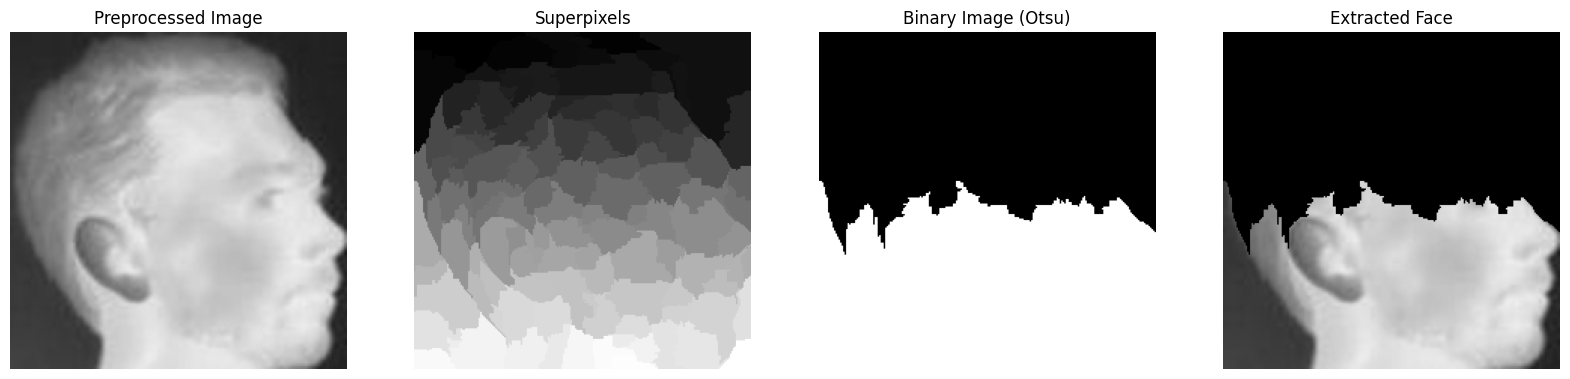

In [ ]:
if __name__ == "__main__":
    image_path = "/content/drive/MyDrive/processed/train/thermal/1-TD-A-0.jpg"  # Update with your image path
    face_image, preprocessed_image, superpixels, binary_image = thermal_face_extraction(image_path)

    # Display results
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(preprocessed_image, cmap='gray')
    ax[0].set_title('Preprocessed Image')
    ax[1].imshow(superpixels, cmap='gray')
    ax[1].set_title('Superpixels')
    ax[2].imshow(binary_image, cmap='gray')
    ax[2].set_title('Binary Image (Otsu)')
    ax[3].imshow(face_image, cmap='gray')
    ax[3].set_title('Extracted Face')
    for a in ax:
        a.axis('off')
    plt.show()